In [2]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import numpy as np

from matplotlib import pyplot as plt
plt.style.use('seaborn-dark')

pd.set_option('display.max_columns', None)

In [3]:
salary_df = pd.read_csv(r"C:/Users/rsk29/Documents/UT/Summer/Data Science Programming/Py files/Project/ds_salaries.csv")

### Understanding the dataset

In [4]:
salary_df.info()
print(salary_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
(3755, 11)


There are 3755 rows and 11 columns in this dataset. The dataset gives information about various metrics that can be used to understand the income salary earned by data scientists across the world

From the above summary its also clear that there are no missing values in the dataset.

In [5]:
duplicate_check = salary_df.drop_duplicates()
duplicate_check.shape

(2584, 11)

The original dataset had 3,755 rows but after dropping duplicates, we are at 2,584 rows

In [6]:
for i in salary_df.columns:
    print(i, " has ", salary_df[i].nunique(), " unique values \n") 

work_year  has  4  unique values 

experience_level  has  4  unique values 

employment_type  has  4  unique values 

job_title  has  93  unique values 

salary  has  815  unique values 

salary_currency  has  20  unique values 

salary_in_usd  has  1035  unique values 

employee_residence  has  78  unique values 

remote_ratio  has  3  unique values 

company_location  has  72  unique values 

company_size  has  3  unique values 



Now we know the unique values in each column, lets exclude 'salary' and 'salary in USD' as they are continuous numeric variables and look at the unique values within the categorical variables

In [7]:
for i in salary_df.columns:
    if( (i != 'salary') and (i != 'salary_in_usd') ):
        print("unique values of ", i, " are ", salary_df[i].unique()) 

unique values of  work_year  are  [2023 2022 2020 2021]
unique values of  experience_level  are  ['SE' 'MI' 'EN' 'EX']
unique values of  employment_type  are  ['FT' 'CT' 'FL' 'PT']
unique values of  job_title  are  ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Enginee

Now let's make the categories more readable

In [8]:
salary_df['experience_level'] = salary_df['experience_level'].replace({
    'SE': 'Senior',
    'EN': 'Entry level',
    'EX': 'Executive level',
    'MI': 'Mid/Intermediate level',
})

salary_df['employment_type'] = salary_df['employment_type'].replace({
    'FL': 'Freelancer',
    'CT': 'Contractor',
    'FT' : 'Full-time',
    'PT' : 'Part-time'
})
salary_df['company_size'] = salary_df['company_size'].replace({
    'S': 'SMALL',
    'M': 'MEDIUM',
    'L' : 'LARGE',
})
salary_df['remote_ratio'] = salary_df['remote_ratio'].astype(str)
salary_df['remote_ratio'] = salary_df['remote_ratio'].replace({
    '0': 'On-Site',
    '50': 'Hybrid',
    '100' : 'Full-Remote',
})

salary_df.head()

work_year        experience_level employment_type  \
0       2023                  Senior       Full-time   
1       2023  Mid/Intermediate level      Contractor   
2       2023  Mid/Intermediate level      Contractor   
3       2023                  Senior       Full-time   
4       2023                  Senior       Full-time   

                  job_title  salary salary_currency  salary_in_usd  \
0  Principal Data Scientist   80000             EUR          85847   
1               ML Engineer   30000             USD          30000   
2               ML Engineer   25500             USD          25500   
3            Data Scientist  175000             USD         175000   
4            Data Scientist  120000             USD         120000   

  employee_residence remote_ratio company_location company_size  
0                 ES  Full-Remote               ES        LARGE  
1                 US  Full-Remote               US        SMALL  
2                 US  Full-Remote               US        SMALL  
3                 CA  Full-Remote               CA       MEDIUM  
4                 CA  Full-Remote               CA       MEDIUM

Now the columsn are more readable. But 'Job_title' column has 93 unique titles and it will be hard to study patterns without grouping them in a meaningful way. So, let's create a word cloud to take a quick look at all the titles and their frequency of occurence.

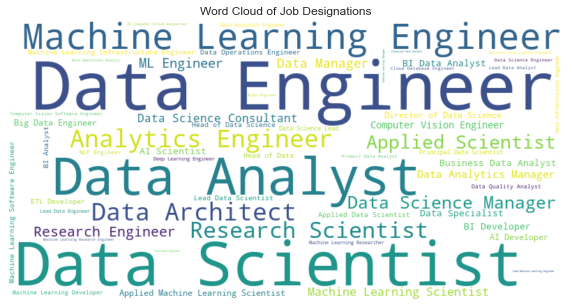

In [9]:
from wordcloud import WordCloud
from collections import Counter

uniq_job_titles = Counter(salary_df['job_title'])

# Convert Counter to dictionary
job_title_dict = dict(uniq_job_titles)

# Create and display Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(job_title_dict)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Job Designations')
plt.show()


Looks like the most common job titles are Data Scientist, Data Analyst, Machine Learning Engineer and Data Engineer. So Let's keep these are ain categories and put other job titles under 'other''

In [10]:
def assign_broader_category(job_title):
    data_engineering = ["Data Analytics Manager", "Manager Data Management", "Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist Lead", "Head of Data Science", "Director of Data Science", "Data Science Manager" , "Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Head of Machine Learning","Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]

    
    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Science"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    else:
        return "Other"

# Apply the function to the 'job_title' column and create a new column 'job_category'
salary_df['job_category'] = salary_df['job_title'].apply(assign_broader_category)

salary_df.head()


work_year        experience_level employment_type  \
0       2023                  Senior       Full-time   
1       2023  Mid/Intermediate level      Contractor   
2       2023  Mid/Intermediate level      Contractor   
3       2023                  Senior       Full-time   
4       2023                  Senior       Full-time   

                  job_title  salary salary_currency  salary_in_usd  \
0  Principal Data Scientist   80000             EUR          85847   
1               ML Engineer   30000             USD          30000   
2               ML Engineer   25500             USD          25500   
3            Data Scientist  175000             USD         175000   
4            Data Scientist  120000             USD         120000   

  employee_residence remote_ratio company_location company_size  \
0                 ES  Full-Remote               ES        LARGE   
1                 US  Full-Remote               US        SMALL   
2                 US  Full-Remote               US        SMALL   
3                 CA  Full-Remote               CA       MEDIUM   
4                 CA  Full-Remote               CA       MEDIUM   

       job_category  
0             Other  
1  Machine Learning  
2  Machine Learning  
3      Data Science  
4      Data Science

*Now that we have formatted the data to make it easily usable, let's get started on EDA.*

1. How does the job opportunities look like across countries for DS related roles?
2. Where does the leadership sit? Is there a clear demarcation of onshore and offshore?
3. How does the salary vary in these cases?
4. As we have salary details for 4 years 2020 - 2023, should we apply inflation and NPV to bring to the scale of the current year?
5. Salary varies across countries and it won't be fair to look at salary just in terms of dollars. So, should we try to factor in the Power Parity Index?
6. Is there a growth in the job opprtunities for DS related roles across the world?
7. How does the salary change across company size?
8. How have the salary grown across years based on experience levels? Is is more concentrated on the senior levels? 
9. Are there any differences between remote and on-site roles based on salary? Which countries are more flexible in terms of offering remote roles? 

##### Applying NPV and normalizign the salary across countries based on PPP needs to be done before we start looking patterns and trends

In [11]:
#Reading inflation and Power parity index
glob_inflation_by_country = pd.read_csv(r"C:/Users/rsk29/Documents/UT/Summer/Data Science Programming/Py files/Project/Global_Inflation_rates.csv", encoding='latin-1')

power_parity_by_country = pd.read_csv(r"C:\Users\rsk29\Documents\UT\Summer\Data Science Programming\Py files\Project\PPP_Index.csv")

country_codes = pd.read_csv(r"C:\Users\rsk29\Documents\UT\Summer\Data Science Programming\Py files\Project\Country_codes.csv",encoding='latin-1')

display(power_parity_by_country.head())
display(country_codes.head())

country  pppInt   pppUsd   pop2023
0          Afghanistan   18.46   18.460  42239854
1              Albania   42.79   42.513   2832439
2              Algeria   41.10   41.100  45606480
3               Angola  204.06  204.060  36684202
4  Antigua and Barbuda    2.03    2.030     94298

Initial country Alpha-2 code Alpha-3 code  Numeric         Country
0     Afghanistan           AF          AFG        4     Afghanistan
1         Albania           AL          ALB        8         Albania
2         Algeria           DZ          DZA       12         Algeria
3  American Samoa           AS          ASM       16  American Samoa
4         Andorra           AD          AND       20         Andorra

In [12]:
glob_inflation_by_country = glob_inflation_by_country.rename(columns = {'Inflation rate, average consumer prices (Annual percent change)':'Country'})
glob_inflation_by_country = glob_inflation_by_country.replace('no data', 0, regex = True)

#Values in this dataset are all objects --> Coverting them to float
for i in glob_inflation_by_country:
    if i != 'Country':
        glob_inflation_by_country[i] = pd.to_numeric(glob_inflation_by_country[i])
        
glob_inflation_l_10_years = glob_inflation_by_country.iloc[ : , [0] + list(range(-10,0)) ]

glob_inflation_l_10_years

Country  2019  2020  2021  2022  2023  2024  2025  \
0                      Afghanistan   2.3   5.6   0.0   0.0   0.0   0.0   0.0   
1                          Albania   1.4   1.6   2.0   6.7   5.0   3.4   3.0   
2                          Algeria   2.0   2.4   7.2   9.3   8.1   7.7   6.5   
3                          Andorra   0.5   0.1   1.7   6.2   5.6   2.9   2.0   
4                           Angola  17.1  22.3  25.8  21.4  11.7  10.8   9.4   
..                             ...   ...   ...   ...   ...   ...   ...   ...   
222  Major advanced economies (G7)   1.5   0.8   3.3   7.3   4.7   2.5   2.0   
223   Middle East and Central Asia   7.6  10.4  12.8  14.3  15.9  12.0   8.3   
224       Other advanced economies   1.1   0.5   2.4   5.6   4.4   2.6   2.1   
225             Sub-Saharan Africa   8.1  10.1  11.0  14.5  14.0  10.5   8.7   
226                          World   3.5   3.2   4.7   8.7   7.0   4.9   3.9   

     2026  2027  2028  
0     0.0   0.0   0.0  
1     3.0   3.0   3.0  
2     6.0   5.6   5.0  
3     1.8   1.7   1.7  
4     9.3   9.1   8.9  
..    ...   ...   ...  
222   1.9   1.9   2.0  
223   7.1   6.7   6.4  
224   2.0   1.9   1.9  
225   8.1   7.8   7.3  
226   3.6   3.5   3.5  

[227 rows x 11 columns]

In [13]:
i=2022
salary_df_ccodes = salary_df.merge(country_codes[['Country','Alpha-2 code']], left_on = 'company_location', right_on = 'Alpha-2 code', how = 'left')
salary_df_ccodes.rename(columns = {'Country':'company_loc'}, inplace = True)
salary_df_ccodes = salary_df_ccodes.merge(country_codes[['Country','Alpha-2 code']], left_on = 'employee_residence', right_on = 'Alpha-2 code', how = 'left')
salary_df_ccodes.rename(columns = {'Country':'employee_res'}, inplace = True)
salary_df_ccodes.drop(columns = ['Alpha-2 code_x','Alpha-2 code_y'], inplace = True)
salary_df_ccodes = salary_df_ccodes.merge(power_parity_by_country[['country','pppUsd']], left_on = 'employee_res', right_on = 'country', how = 'left')
salary_df_ccodes = salary_df_ccodes.merge(glob_inflation_l_10_years, left_on = 'employee_res', right_on = 'Country', how = 'left')
salary_df_ccodes.drop(columns = ['country','Country'], inplace = True)
salary_df_ccodes.fillna(0)
salary_df_ccodes.head()


work_year        experience_level employment_type  \
0       2023                  Senior       Full-time   
1       2023  Mid/Intermediate level      Contractor   
2       2023  Mid/Intermediate level      Contractor   
3       2023                  Senior       Full-time   
4       2023                  Senior       Full-time   

                  job_title  salary salary_currency  salary_in_usd  \
0  Principal Data Scientist   80000             EUR          85847   
1               ML Engineer   30000             USD          30000   
2               ML Engineer   25500             USD          25500   
3            Data Scientist  175000             USD         175000   
4            Data Scientist  120000             USD         120000   

  employee_residence remote_ratio company_location company_size  \
0                 ES  Full-Remote               ES        LARGE   
1                 US  Full-Remote               US        SMALL   
2                 US  Full-Remote               US        SMALL   
3                 CA  Full-Remote               CA       MEDIUM   
4                 CA  Full-Remote               CA       MEDIUM   

       job_category    company_loc   employee_res  pppUsd  2019  2020  2021  \
0             Other          Spain          Spain   0.626   0.8  -0.3   3.0   
1  Machine Learning  United States  United States   1.000   1.8   1.3   4.7   
2  Machine Learning  United States  United States   1.000   1.8   1.3   4.7   
3      Data Science         Canada         Canada   1.236   1.9   0.7   3.4   
4      Data Science         Canada         Canada   1.236   1.9   0.7   3.4   

   2022  2023  2024  2025  2026  2027  2028  
0   8.3   4.3   3.2   2.0   1.8   1.7   1.7  
1   8.0   4.5   2.3   2.1   2.0   2.0   2.1  
2   8.0   4.5   2.3   2.1   2.0   2.0   2.1  
3   6.8   3.9   2.4   1.9   1.9   1.9   2.0  
4   6.8   3.9   2.4   1.9   1.9   1.9   2.0

For the sake of simplicity we are making the following assumption
1. Inflation will applied based on employee residence 
2. When we apply inflation rate to salary to bring to the 2023 salary scale, we are not accounting for the market growth in general

In [14]:
xx = salary_df_ccodes
xx['norm_salary_ppp'] = 0
xx['norm_salary_ppp_inf'] = 0

for i in range(len(salary_df_ccodes)):
    if salary_df_ccodes['salary_currency'][i] != 'USD':
        salary_df_ccodes['norm_salary_ppp'][i] = salary_df_ccodes['salary'][i]/salary_df_ccodes['pppUsd'][i]
    else:
        salary_df_ccodes['norm_salary_ppp'][i] = salary_df_ccodes['salary_in_usd'][i]

    if salary_df_ccodes['work_year'][i] == 2020:
        salary_df_ccodes['norm_salary_ppp_inf'][i] = salary_df_ccodes['norm_salary_ppp'][i]*( 1 + salary_df_ccodes['2021'][i]/100 ) * (1 + salary_df_ccodes['2022'][i]/100)*( 1 + salary_df_ccodes['2023'][i]/100)
    elif salary_df_ccodes['work_year'][i] == 2021:
        salary_df_ccodes['norm_salary_ppp_inf'][i] = salary_df_ccodes['norm_salary_ppp'][i]*(1 + salary_df_ccodes['2022'][i]/100)*( 1 + salary_df_ccodes['2023'][i]/100)
    elif salary_df_ccodes['work_year'][i] == 2022:
        salary_df_ccodes['norm_salary_ppp_inf'][i] = salary_df_ccodes['norm_salary_ppp'][i]*( 1 + salary_df_ccodes['2023'][i]/100)
    elif salary_df_ccodes['work_year'][i] == 2023:
        salary_df_ccodes['norm_salary_ppp_inf'][i] = salary_df_ccodes['norm_salary_ppp'][i]
      


xx.head()

<ipython-input-14-68ed8a0f534d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_ccodes['norm_salary_ppp'][i] = salary_df_ccodes['salary'][i]/salary_df_ccodes['pppUsd'][i]
<ipython-input-14-68ed8a0f534d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_ccodes['norm_salary_ppp_inf'][i] = salary_df_ccodes['norm_salary_ppp'][i]
<ipython-input-14-68ed8a0f534d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary_df_

work_year        experience_level employment_type  \
0       2023                  Senior       Full-time   
1       2023  Mid/Intermediate level      Contractor   
2       2023  Mid/Intermediate level      Contractor   
3       2023                  Senior       Full-time   
4       2023                  Senior       Full-time   

                  job_title  salary salary_currency  salary_in_usd  \
0  Principal Data Scientist   80000             EUR          85847   
1               ML Engineer   30000             USD          30000   
2               ML Engineer   25500             USD          25500   
3            Data Scientist  175000             USD         175000   
4            Data Scientist  120000             USD         120000   

  employee_residence remote_ratio company_location company_size  \
0                 ES  Full-Remote               ES        LARGE   
1                 US  Full-Remote               US        SMALL   
2                 US  Full-Remote               US        SMALL   
3                 CA  Full-Remote               CA       MEDIUM   
4                 CA  Full-Remote               CA       MEDIUM   

       job_category    company_loc   employee_res  pppUsd  2019  2020  2021  \
0             Other          Spain          Spain   0.626   0.8  -0.3   3.0   
1  Machine Learning  United States  United States   1.000   1.8   1.3   4.7   
2  Machine Learning  United States  United States   1.000   1.8   1.3   4.7   
3      Data Science         Canada         Canada   1.236   1.9   0.7   3.4   
4      Data Science         Canada         Canada   1.236   1.9   0.7   3.4   

   2022  2023  2024  2025  2026  2027  2028  norm_salary_ppp  \
0   8.3   4.3   3.2   2.0   1.8   1.7   1.7         127795.0   
1   8.0   4.5   2.3   2.1   2.0   2.0   2.1          30000.0   
2   8.0   4.5   2.3   2.1   2.0   2.0   2.1          25500.0   
3   6.8   3.9   2.4   1.9   1.9   1.9   2.0         175000.0   
4   6.8   3.9   2.4   1.9   1.9   1.9   2.0         120000.0   

   norm_salary_ppp_inf  
0             127795.0  
1              30000.0  
2              25500.0  
3             175000.0  
4             120000.0

In [15]:
# Extract the country names from the first column
countries = glob_inflation_l_10_years[glob_inflation_l_10_years['Country'] == 'World'].iloc[:, 0]

# Extract the yearly inflation rates from the next 19 columns
inflation_rates =glob_inflation_l_10_years[glob_inflation_l_10_years['Country'] == 'World'].iloc[:, 1:]

# Convert the inflation_rates DataFrame to a long format for Plotly Express
inflation_rates_long = pd.melt(inflation_rates, var_name='Year', value_name='Inflation Rate', ignore_index=True)

# display(inflation_rates_long)
# Create the bar chart using Plotly Express
fig = px.bar(
    inflation_rates_long, 
    x='Year', 
    y='Inflation Rate', 
    labels={'Year':'Year', 'Inflation Rate':'Inflation Rate'},
    color='Inflation Rate',  # Color based on the 'Inflation Rate' values
    color_continuous_scale='Blues',
    color_continuous_midpoint=3,# Choose the color scale ('Blues' for blue shades)
    text='Inflation Rate'
)

# Customize the plot
fig.update_layout(
    title='Global Yearly Inflation Rates (Actual 2019-2023 & Forecast 2024-2028)',
    title_x=0.5,
    xaxis_title='Year',
    yaxis_title='Inflation Rate (%)',
    showlegend=False,
)

# Show the plot
fig.show()

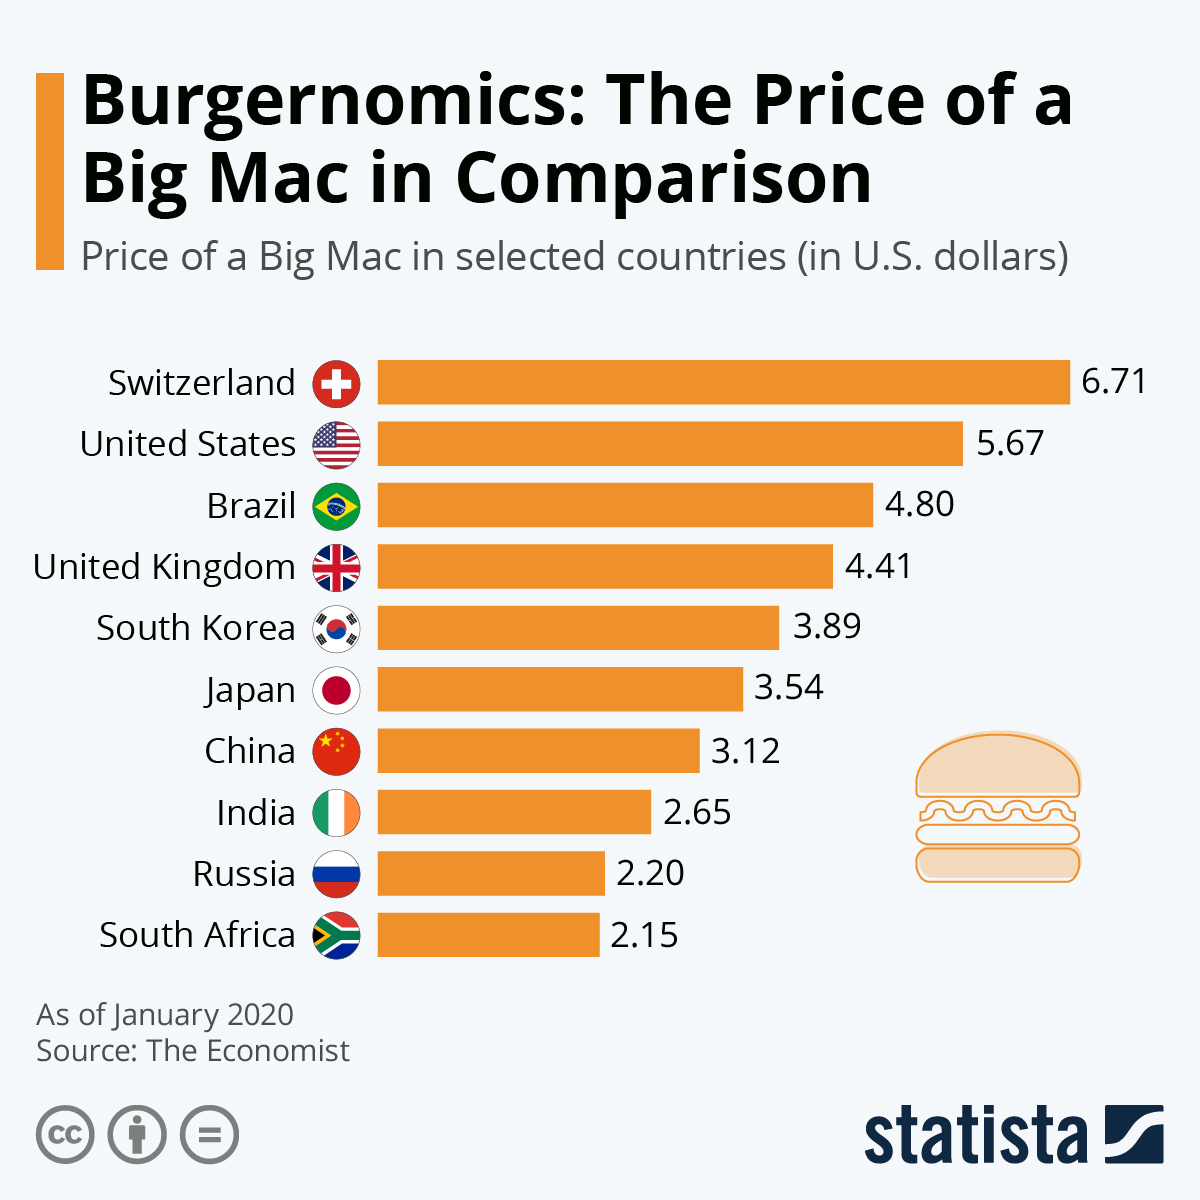

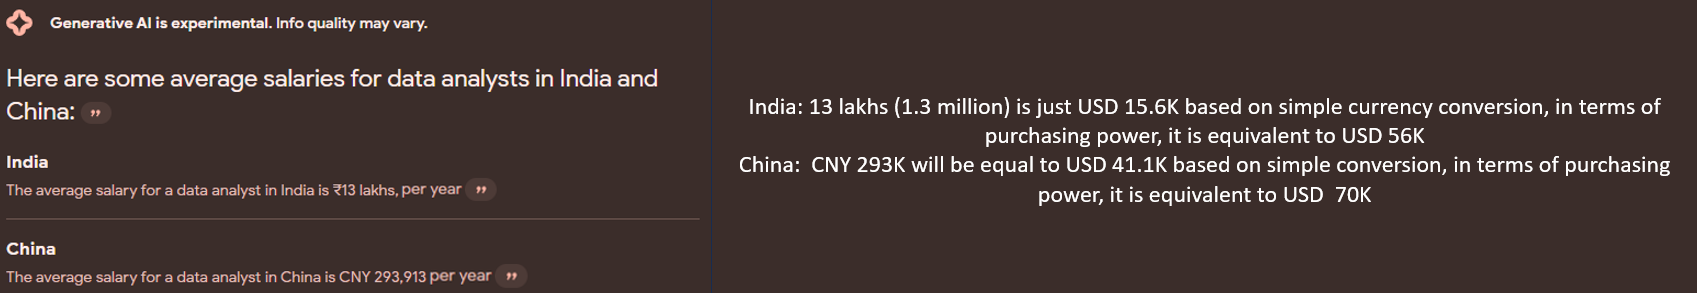

 As we are planning to predict the salary through this exercise, let's focus how various variables are related to salary.*

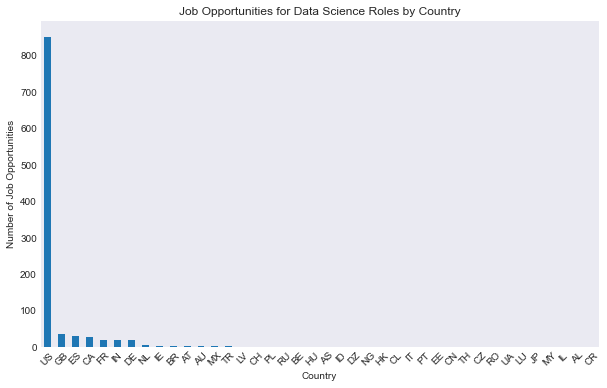

In [16]:
#How does the job opportunities look like across countries for DS related roles?

data_scientist = [
    "Data Scientist Lead", "Head of Data Science", "Director of Data Science",
    "Data Science Manager", "Data Scientist", "Applied Scientist", "Research Scientist",
    "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"
]
data_science_df = salary_df[salary_df["job_title"].isin(data_scientist)]
country_counts = data_science_df["company_location"].value_counts()

plt.figure(figsize=(10, 6))
country_counts.plot(kind="bar")
plt.xlabel("Country")
plt.ylabel("Number of Job Opportunities")
plt.title("Job Opportunities for Data Science Roles by Country")
plt.xticks(rotation=45)
plt.show()

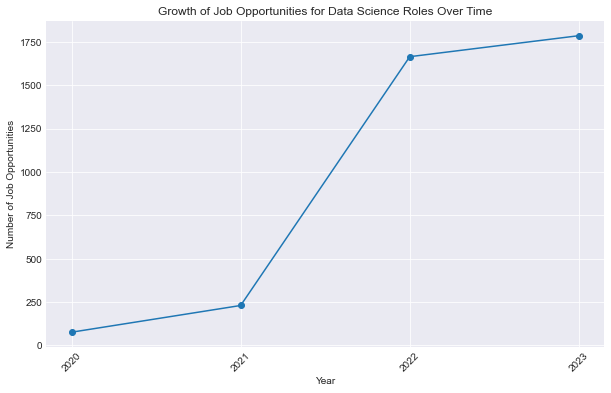

In [17]:
#Is there a growth in the job opprtunities for DS related roles across the world?

yearly_counts = salary_df["work_year"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o')
plt.xlabel("Year")
plt.ylabel("Number of Job Opportunities")
plt.title("Growth of Job Opportunities for Data Science Roles Over Time")
plt.grid(True)
plt.xticks(yearly_counts.index, rotation=45)
plt.show()

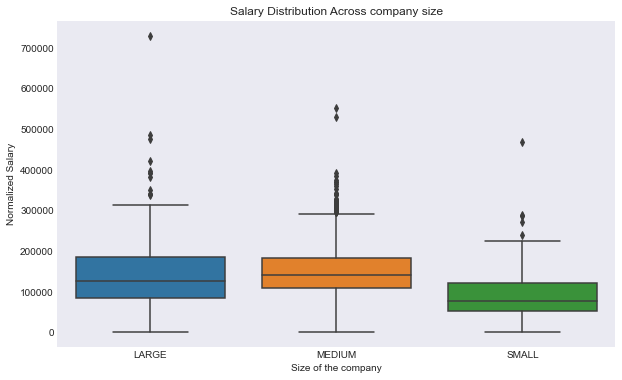

In [18]:
#How does the salary change across company size?

plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df_ccodes, x='company_size', y='norm_salary_ppp_inf', order=['LARGE', 'MEDIUM', 'SMALL'])
plt.title('Salary Distribution Across company size')
plt.xlabel('Size of the company')
plt.ylabel('Normalized Salary')
plt.show()

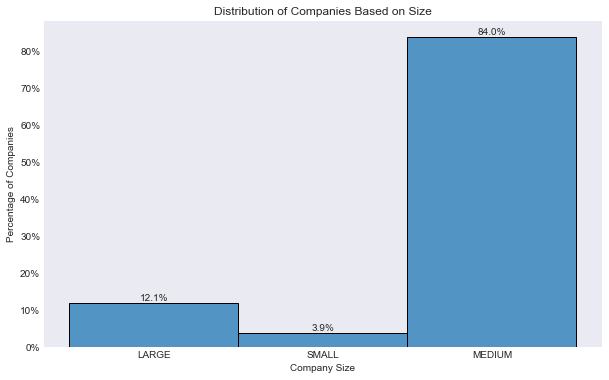

In [19]:
#How does the salary change across company size?


plt.figure(figsize=(10, 6))
ax = sns.histplot(data=salary_df_ccodes, x='company_size', stat='probability')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.title('Distribution of Companies Based on Size')
plt.xlabel('Company Size')
plt.ylabel('Percentage of Companies')

# Annotate each bar with its percentage value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()


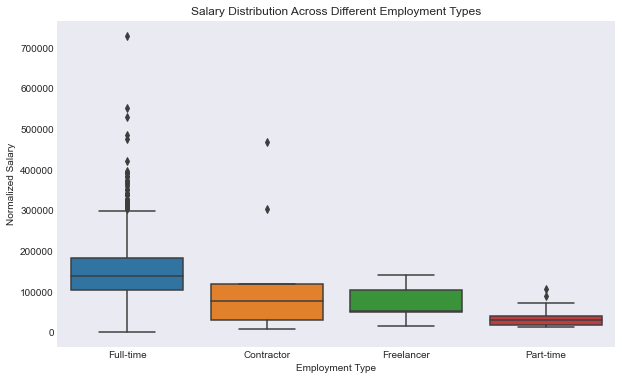

In [20]:
#How does the salary change based on employment type?
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df_ccodes, x='employment_type', y='norm_salary_ppp_inf')
plt.title('Salary Distribution Across Different Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Normalized Salary')
plt.show()

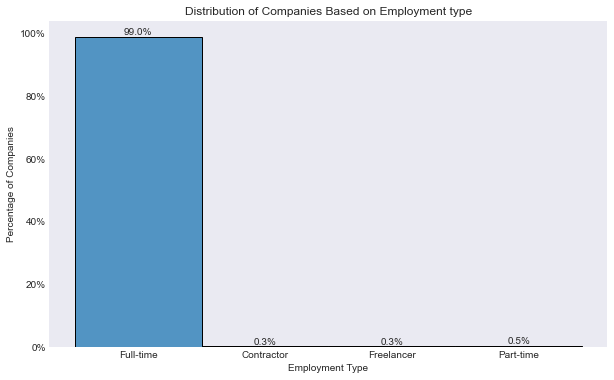

In [21]:
#How does the salary change based on employment type?

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=salary_df_ccodes, x='employment_type', stat='probability')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.title('Distribution of Companies Based on Employment type')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Companies')

# Annotate each bar with its percentage value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

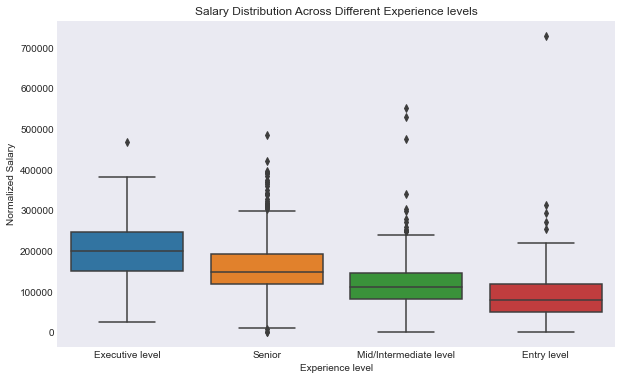

In [22]:
#How does the salary based on experience level

plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df_ccodes, x='experience_level', y='norm_salary_ppp_inf', order = ['Executive level','Senior','Mid/Intermediate level','Entry level'])
plt.title('Salary Distribution Across Different Experience levels')
plt.xlabel('Experience level')
plt.ylabel('Normalized Salary')
plt.show()

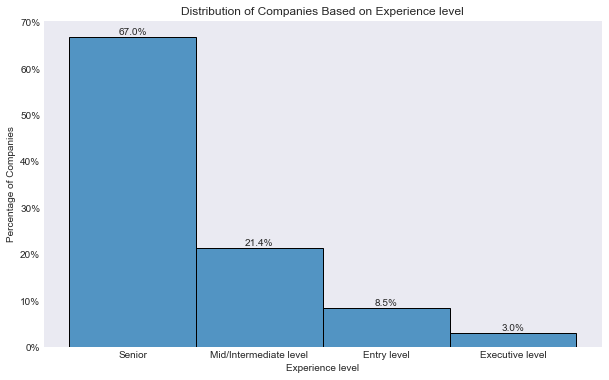

In [23]:
#How does the salary change based on employment type?

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=salary_df_ccodes, x='experience_level', stat='probability')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.title('Distribution of Companies Based on Experience level')
plt.xlabel('Experience level')
plt.ylabel('Percentage of Companies')

# Annotate each bar with its percentage value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

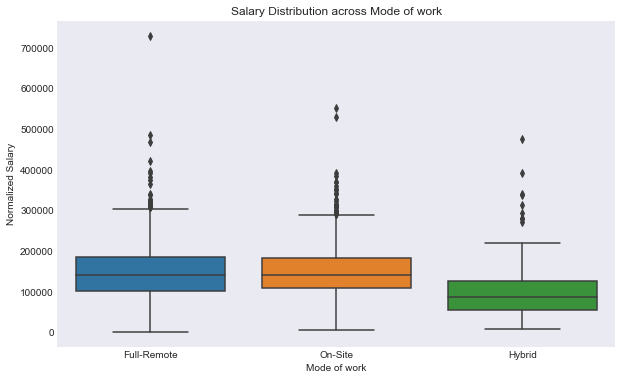

In [24]:
#How does the salary based on remote vs hybrid vs full time work
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df_ccodes, x='remote_ratio', y='norm_salary_ppp_inf')
plt.title('Salary Distribution across Mode of work')
plt.xlabel('Mode of work')
plt.ylabel('Normalized Salary')
plt.show()

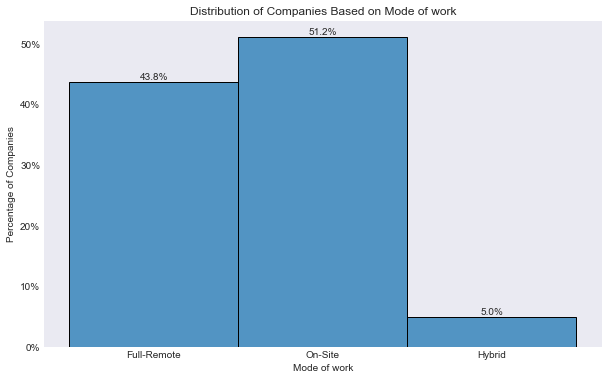

In [25]:
#How does the salary change based on employment type?

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=salary_df_ccodes, x='remote_ratio', stat='probability')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.title('Distribution of Companies Based on Mode of work')
plt.xlabel('Mode of work')
plt.ylabel('Percentage of Companies')

# Annotate each bar with its percentage value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

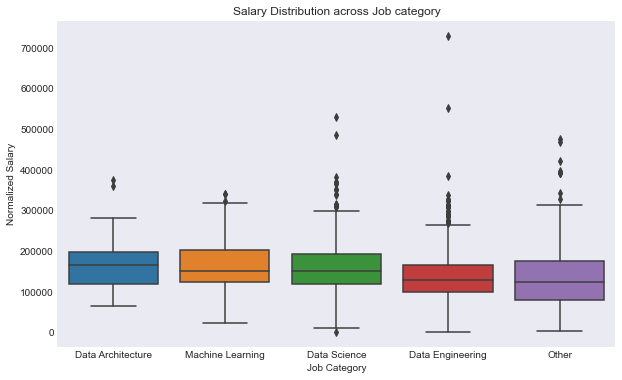

In [26]:
# How does the salary based on job group
plt.figure(figsize=(10, 6))
sns.boxplot(data=salary_df_ccodes, x='job_category', y='norm_salary_ppp_inf', order = ['Data Architecture','Machine Learning', 'Data Science','Data Engineering','Other'])
plt.title('Salary Distribution across Job category')
plt.xlabel('Job Category')
plt.ylabel('Normalized Salary')
plt.show()

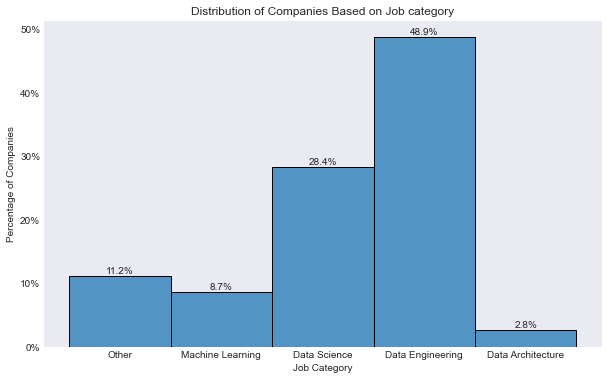

In [27]:
#How does the salary change based on employment type?

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=salary_df_ccodes, x='job_category', stat='probability')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))
plt.title('Distribution of Companies Based on Job category')
plt.xlabel('Job Category')
plt.ylabel('Percentage of Companies')

# Annotate each bar with its percentage value
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.1f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=10)

plt.show()

In [28]:
# Where are most of the companies situated?
business_concentration = salary_df_ccodes['company_loc'].value_counts().reset_index()
business_concentration.columns = ['Country of Employee', 'Count']
business_concentration

# Create the choropleth map with a logarithmic color scale
fig = px.choropleth(business_concentration, 
                    locations='Country of Employee', 
                    locationmode='country names',
                    color=np.log10(business_concentration['Count']), 
                    hover_name='Country of Employee',
                    hover_data=['Count'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Map of Business concentration',
                    projection='natural earth')

# Customize the colorbar to show the original count values
fig.update_coloraxes(colorbar=dict(title='Number of companies', tickvals=[0, 1, 2, 3], ticktext=['1', '10', '100', '1000']))
# Center-align the title
fig.update_layout(title_x=0.5)
# Show the map
fig.show()

In [29]:
# Where are most of the companies situated?
Salary_distribution = salary_df_ccodes.groupby('company_loc')['norm_salary_ppp_inf'].mean().reset_index()
Salary_distribution.columns = ['Country', 'Average_salary']
Salary_distribution

# Create the choropleth map with a logarithmic color scale
fig = px.choropleth(Salary_distribution, 
                    locations='Country', 
                    locationmode='country names',
                    color=Salary_distribution['Average_salary'], 
                    hover_name='Country',
                    hover_data=['Average_salary'],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Salary by Company Location',
                    projection='natural earth')

# Center-align the title
fig.update_layout(title_x=0.5)
# Show the map
fig.show()

In [31]:
# Split of remote and full time across years

work_year_full_vs_rem = salary_df_ccodes.groupby(['work_year','remote_ratio'])['experience_level'].count().reset_index().rename(columns = {'experience_level':'Number_of_jobs'})
work_year_full_vs_rem

work_year remote_ratio  Number_of_jobs
0        2020  Full-Remote              39
1        2020       Hybrid              21
2        2020      On-Site              16
3        2021  Full-Remote             120
4        2021       Hybrid              76
5        2021      On-Site              34
6        2022  Full-Remote             891
7        2022       Hybrid              62
8        2022      On-Site             711
9        2023  Full-Remote             593
10       2023       Hybrid              30
11       2023      On-Site            1162

remote_ratio  Full-Remote  Hybrid  On-Site
work_year                                 
2020                   39      21       16
2021                  120      76       34
2022                  891      62      711
2023                  593      30     1162

work_year
2020      76
2021     230
2022    1664
2023    1785
dtype: int64

work_year
2020    21.052632
2021    14.782609
2022    42.728365
2023    65.098039
dtype: float64

Int64Index([2020, 2021, 2022, 2023], dtype='int64', name='work_year')

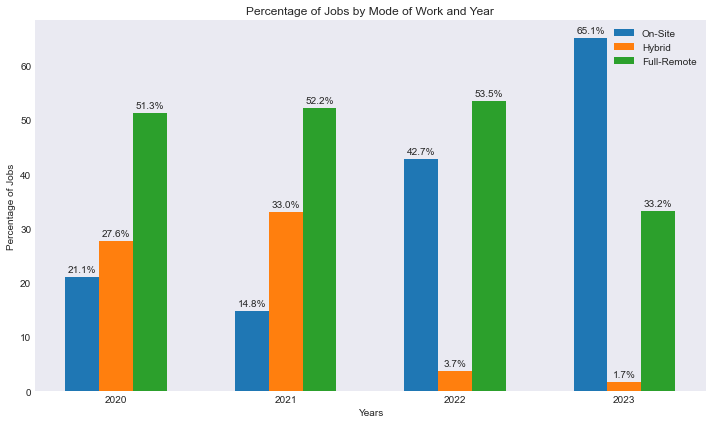

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'work_year_full_vs_rem' is your DataFrame containing the data
# and the three modes of work are 'mode1', 'mode2', and 'mode3'

# Pivot the DataFrame to get the data in the desired format
pivot_df = work_year_full_vs_rem.pivot(index='work_year', columns='remote_ratio', values='Number_of_jobs')

display(pivot_df)

# Calculate the total number of jobs for each year
total_jobs = pivot_df.sum(axis=1)

display(total_jobs)

# Calculate the percentage of counts for each mode of work
mode1_percent = (pivot_df['On-Site'] / total_jobs) * 100
mode2_percent = (pivot_df['Hybrid'] / total_jobs) * 100
mode3_percent = (pivot_df['Full-Remote'] / total_jobs) * 100


display(mode1_percent)

# Create the clustered bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bar_width = 0.2  # Adjust the bar width as needed

years = pivot_df.index

display(years)


bar1 = plt.bar(years - bar_width, mode1_percent, width=bar_width, label='On-Site')
bar2 = plt.bar(years, mode2_percent, width=bar_width, label='Hybrid')
bar3 = plt.bar(years + bar_width, mode3_percent, width=bar_width, label='Full-Remote')

plt.xlabel('Years')
plt.ylabel('Percentage of Jobs')
plt.title('Percentage of Jobs by Mode of Work and Year')
plt.xticks(years)
plt.legend()
plt.tight_layout()

# Function to annotate the bars with percentage values
def annotate_bar(bar):
    for rect in bar:
        height = rect.get_height()
        plt.annotate(f'{height:.1f}%', xy=(rect.get_x() + rect.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Annotate each bar with the percentage value
annotate_bar(bar1)
annotate_bar(bar2)
annotate_bar(bar3)

plt.show()


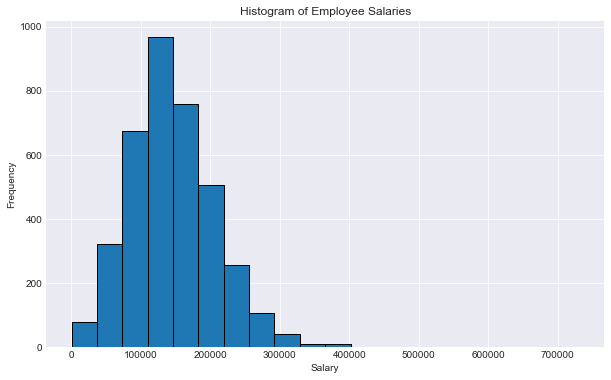

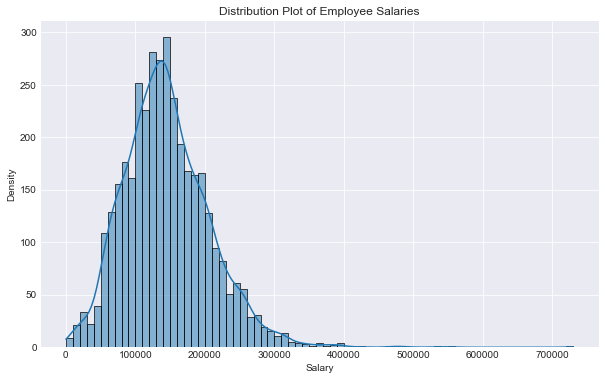

C:\Users\rsk29\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



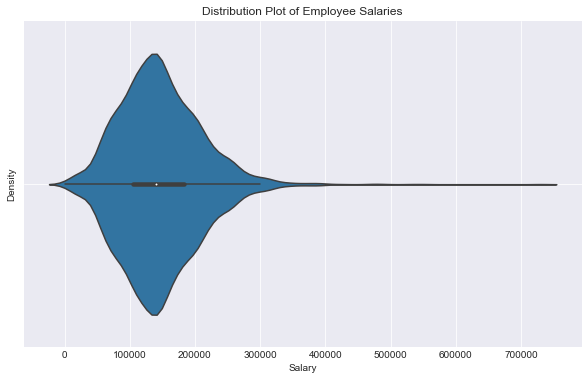

In [48]:
# Now lets move on to the data preparation phase

# Create a histogram using matplotlib
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(salary_df_ccodes['norm_salary_ppp_inf'], bins=20, edgecolor='k')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Employee Salaries')
plt.grid(True)
plt.show()

# Create a displot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(salary_df_ccodes['norm_salary_ppp_inf'], kde=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Distribution Plot of Employee Salaries')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.violinplot(salary_df_ccodes['norm_salary_ppp_inf'], kde=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Distribution Plot of Employee Salaries')
plt.grid(True)
plt.show()


The data looks normally distributed. So we do not need any tranformation to adjust the skew. Now let's split the salary into 4 groups based on quartile and categorize them as VH, H , M and L

145510.3462870811 62403.801726956925
3755 3585 170


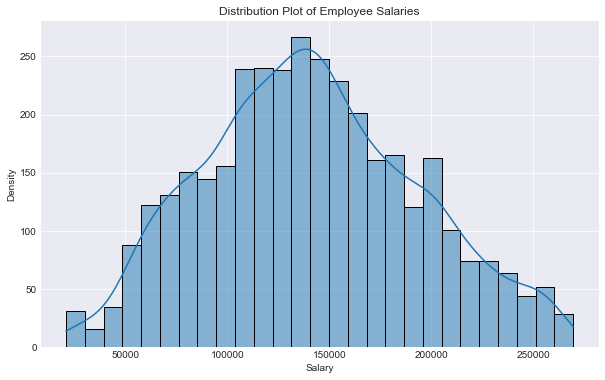

In [49]:
#Before that lets remove the outliers in the dataset ( mean +- 2 std)
import statistics
mean_norm_sal = salary_df_ccodes['norm_salary_ppp_inf'].mean()
sd_norm_sal = np.std(salary_df_ccodes['norm_salary_ppp_inf'])

print(mean_norm_sal, sd_norm_sal)


salary_df_ccodes_out_cleaned = salary_df_ccodes[abs(salary_df_ccodes.norm_salary_ppp_inf - mean_norm_sal)<= 2*sd_norm_sal]

x = len(salary_df_ccodes_out_cleaned)
y = len(salary_df_ccodes)
print(y , x, y-x)


#removing the 170 outliers from the dataset

# Create a displot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(salary_df_ccodes_out_cleaned['norm_salary_ppp_inf'], kde=True)
plt.xlabel('Salary')
plt.ylabel('Density')
plt.title('Distribution Plot of Employee Salaries')
plt.grid(True)
plt.show()

In [50]:

# Assuming 'salary_df_ccodes_out_cleaned' is your DataFrame containing the 'norm_salary_ppp_inf' column

# Calculate the quartiles (25th, 50th, and 75th percentiles)
salary_perc_cutoff = salary_df_ccodes_out_cleaned.norm_salary_ppp_inf.quantile(0.75)

# Define the bin edges for the quantiles
bin_edges = [float('-inf'), salary_perc_cutoff, float('inf')]

# Define the labels for the bins
bin_labels = [0, 1]

# Create the 'norm_sal_cat' column using cut function
salary_df_ccodes_out_cleaned['norm_sal_cat'] = pd.cut(salary_df_ccodes_out_cleaned['norm_salary_ppp_inf'], bins=bin_edges, labels=bin_labels)

salary_df_ccodes_out_cleaned.head()

<ipython-input-50-dfd5b4564a88>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



work_year        experience_level employment_type  \
0       2023                  Senior       Full-time   
1       2023  Mid/Intermediate level      Contractor   
2       2023  Mid/Intermediate level      Contractor   
3       2023                  Senior       Full-time   
4       2023                  Senior       Full-time   

                  job_title  salary salary_currency  salary_in_usd  \
0  Principal Data Scientist   80000             EUR          85847   
1               ML Engineer   30000             USD          30000   
2               ML Engineer   25500             USD          25500   
3            Data Scientist  175000             USD         175000   
4            Data Scientist  120000             USD         120000   

  employee_residence remote_ratio company_location company_size  \
0                 ES  Full-Remote               ES        LARGE   
1                 US  Full-Remote               US        SMALL   
2                 US  Full-Remote               US        SMALL   
3                 CA  Full-Remote               CA       MEDIUM   
4                 CA  Full-Remote               CA       MEDIUM   

       job_category    company_loc   employee_res  pppUsd  2019  2020  2021  \
0             Other          Spain          Spain   0.626   0.8  -0.3   3.0   
1  Machine Learning  United States  United States   1.000   1.8   1.3   4.7   
2  Machine Learning  United States  United States   1.000   1.8   1.3   4.7   
3      Data Science         Canada         Canada   1.236   1.9   0.7   3.4   
4      Data Science         Canada         Canada   1.236   1.9   0.7   3.4   

   2022  2023  2024  2025  2026  2027  2028  norm_salary_ppp  \
0   8.3   4.3   3.2   2.0   1.8   1.7   1.7         127795.0   
1   8.0   4.5   2.3   2.1   2.0   2.0   2.1          30000.0   
2   8.0   4.5   2.3   2.1   2.0   2.0   2.1          25500.0   
3   6.8   3.9   2.4   1.9   1.9   1.9   2.0         175000.0   
4   6.8   3.9   2.4   1.9   1.9   1.9   2.0         120000.0   

   norm_salary_ppp_inf norm_sal_cat  
0             127795.0            0  
1              30000.0            0  
2              25500.0            0  
3             175000.0            0  
4             120000.0            0

In [51]:
modelling_df = salary_df_ccodes_out_cleaned[['work_year','experience_level','employment_type','remote_ratio','company_size','job_category','company_loc','employee_res','norm_sal_cat']]
modelling_df_predictors = salary_df_ccodes_out_cleaned[['experience_level','employment_type','remote_ratio','company_size','job_category','company_loc','employee_res']]
modelling_df_target = salary_df_ccodes_out_cleaned['norm_sal_cat'].astype('category')

In [52]:
model_matrix = pd.get_dummies(modelling_df_predictors, drop_first = True)

In [53]:
model_matrix.head()

experience_level_Executive level  experience_level_Mid/Intermediate level  \
0                                 0                                        0   
1                                 0                                        1   
2                                 0                                        1   
3                                 0                                        0   
4                                 0                                        0   

   experience_level_Senior  employment_type_Freelancer  \
0                        1                           0   
1                        0                           0   
2                        0                           0   
3                        1                           0   
4                        1                           0   

   employment_type_Full-time  employment_type_Part-time  remote_ratio_Hybrid  \
0                          1                          0                    0   
1                          0                          0                    0   
2                          0                          0                    0   
3                          1                          0                    0   
4                          1                          0                    0   

   remote_ratio_On-Site  company_size_MEDIUM  company_size_SMALL  \
0                     0                    0                   0   
1                     0                    0                   1   
2                     0                    0                   1   
3                     0                    1                   0   
4                     0                    1                   0   

   job_category_Data Engineering  job_category_Data Science  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          1   
4                              0                          1   

   job_category_Machine Learning  job_category_Other  \
0                              0                   1   
1                              1                   0   
2                              1                   0   
3                              0                   0   
4                              0                   0   

   company_loc_American Samoa  company_loc_Argentina  company_loc_Armenia  \
0                           0                      0                    0   
1                           0                      0                    0   
2                           0                      0                    0   
3                           0                      0                    0   
4                           0                      0                    0   

   company_loc_Australia  company_loc_Austria  company_loc_Belgium  \
0                      0                    0                    0   
1                      0                    0                    0   
2                      0                    0                    0   
3                      0                    0                    0   
4                      0                    0                    0   

   company_loc_Bosnia and Herzegovina  company_loc_Brazil  company_loc_Canada  \
0                                   0                   0                   0   
1                                   0                   0                   0   
2                                   0                   0                   0   
3                                   0                   0                   1   
4                                   0                   0                   1   

   company_loc_Chile  company_loc_Colombia  company_loc_Costa Rica  \
0                  0                     0                       0   
1                  0                     0              

### The Base model - Logistic regression

Accuracy of the logistic regression model: 0.76
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       804
           1       0.65      0.07      0.13       272

    accuracy                           0.76      1076
   macro avg       0.70      0.53      0.49      1076
weighted avg       0.73      0.76      0.67      1076



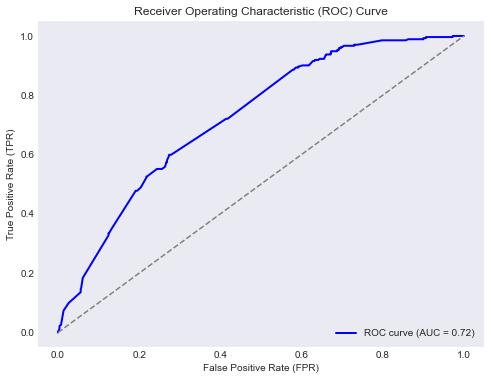

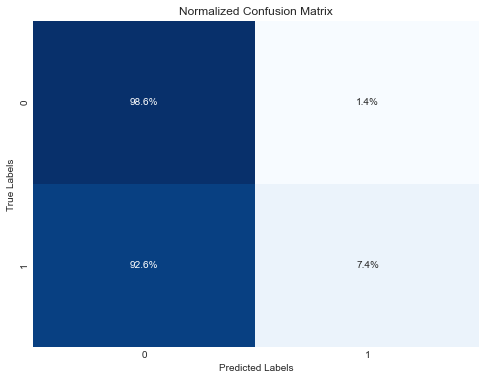

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix


# Assuming 'model_matrix' and 'modelling_df_target' are your feature matrix and target variable, respectively

# # Convert the target variable to binary labels
# y_binary = modelling_df_target.map({'Below_75th': 0, 'Above_75th': 1})

# Split the data into features (X) and the target variable (y)
X = model_matrix
y = modelling_df_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate the predicted probabilities of the positive class
y_probs = logreg.predict_proba(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_pred, normalize='true')

# Plot the normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1%', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

### From the above model we see that there is very low recall for above 75th perc due to lower samples. Also we need to check the importance of different predictors. So lets use lasso regression to remove unwanted variables - 

Accuracy of the logistic regression model with LASSO: 0.75
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       804
           1       0.54      0.03      0.05       272

    accuracy                           0.75      1076
   macro avg       0.64      0.51      0.45      1076
weighted avg       0.70      0.75      0.65      1076

Feature Penalties (Coefficients):
experience_level_Executive level: 2.5273
experience_level_Mid/Intermediate level: 0.2761
experience_level_Senior: 1.5168
employment_type_Freelancer: 0.0000
employment_type_Full-time: 0.0000
employment_type_Part-time: 0.0000
remote_ratio_Hybrid: -0.5644
remote_ratio_On-Site: -0.1259
company_size_MEDIUM: -0.3003
company_size_SMALL: -0.7034
job_category_Data Engineering: -0.6677
job_category_Data Science: 0.1975
job_category_Machine Learning: 0.4394
job_category_Other: -0.0147
company_loc_American Samoa: 0.0000
company_loc_Argentina: 0.0000
company_loc_Armenia: 0.0000
company_

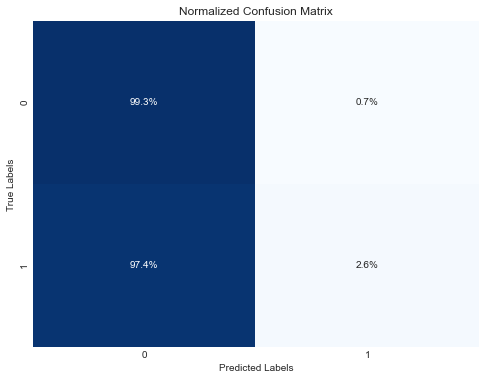

(1076, 139)

In [56]:
# Initialize and fit the logistic regression model with L1 regularization (LASSO)
logreg_lasso = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
logreg_lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_lasso.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model with LASSO: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Print the learned coefficients (feature penalties)
print("Feature Penalties (Coefficients):")
for feature, penalty in zip(X.columns, logreg_lasso.coef_[0]):
    print(f"{feature}: {penalty:.4f}")

# Plot the normalized confusion matrix
cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1%', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

X_test.shape

### Now that we have removed the unwanted predictors, we can look at the updated logistic regression model - 

Total number of features: 18
Accuracy of the logistic regression model: 0.76
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       804
           1       0.65      0.07      0.13       272

    accuracy                           0.76      1076
   macro avg       0.70      0.53      0.49      1076
weighted avg       0.73      0.76      0.67      1076



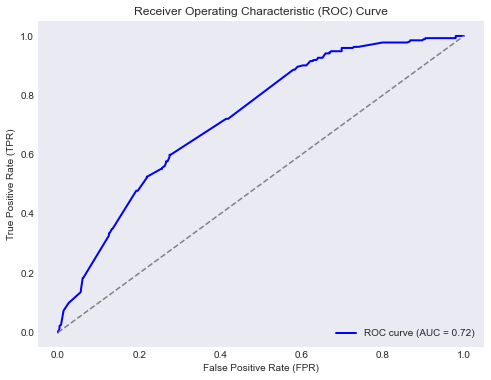

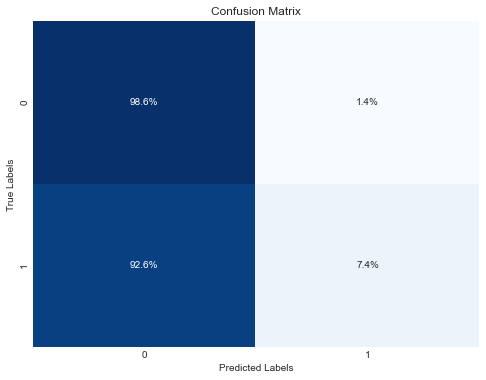

(1076, 18)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
# Assuming 'model_matrix' and 'modelling_df_target' are your feature matrix and target variable, respectively

# Convert the target variable to binary labels
y_binary = modelling_df_target.map({'Below_75th': 0, 'Above_75th': 1})

# Split the data into features (X) and the target variable (y)
model_matrix_cleaned = model_matrix[['experience_level_Executive level','experience_level_Mid/Intermediate level','experience_level_Senior','remote_ratio_Hybrid','remote_ratio_On-Site','company_size_MEDIUM','company_size_SMALL','job_category_Data Engineering','job_category_Data Science','job_category_Machine Learning','company_loc_Spain','company_loc_Canada','company_loc_United States','employee_res_France','employee_res_India','employee_res_Portugal','employee_res_United Kingdom','employee_res_United States']]
total_features = model_matrix_cleaned.shape[1]

print(f"Total number of features: {total_features}")

X = model_matrix_cleaned
y = modelling_df_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Calculate the predicted probabilities of the positive class
y_probs = logreg.predict_proba(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1%', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

X_test.shape

### Now we have handeld for non-important variables. Let's move on to adjusting for class imbalance ( lower samples for above 75th perc) using RandomUnderSampler

Total number of features: 11
original dataset shape: Counter({0: 1891, 1: 618})
Resample dataset shape Counter({0: 618, 1: 618})
Accuracy of the logistic regression model: 0.62
              precision    recall  f1-score   support

           0       0.85      0.60      0.70       804
           1       0.37      0.69      0.48       272

    accuracy                           0.62      1076
   macro avg       0.61      0.65      0.59      1076
weighted avg       0.73      0.62      0.65      1076



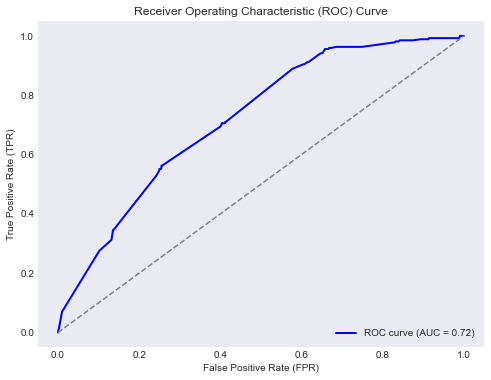

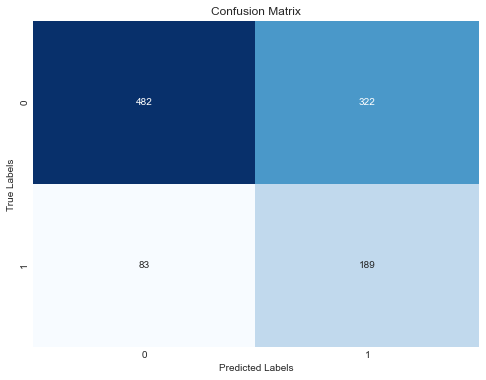

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
# Assuming 'model_matrix' and 'modelling_df_target' are your feature matrix and target variable, respectively

# Split the data into features (X) and the target variable (y)
model_matrix_cleaned = model_matrix[['experience_level_Executive level','experience_level_Senior','remote_ratio_Hybrid','remote_ratio_On-Site','company_size_SMALL','job_category_Data Engineering','job_category_Machine Learning','company_loc_India','company_loc_Canada','employee_res_United Kingdom','employee_res_United States']]
total_features = model_matrix_cleaned.shape[1]

print(f"Total number of features: {total_features}")

X = model_matrix_cleaned
y = modelling_df_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rus = RandomUnderSampler(random_state=42, replacement=False)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus))

# Initialize and fit the logistic regression model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(x_rus, y_rus)

# Make predictions on the test set
y_pred_lgr = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_lgr)
print(f"Accuracy of the logistic regression model: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_lgr))

# Calculate the predicted probabilities of the positive class
y_probs = logreg.predict_proba(X_test)

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, y_pred_lgr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### This model is definetely better the previous logistic regression models. now let's move on to KNN 


Best K Value: 27
Accuracy of the KNN model: 0.76
              precision    recall  f1-score   support

           0       0.77      0.98      0.86       804
           1       0.65      0.13      0.22       272

    accuracy                           0.76      1076
   macro avg       0.71      0.55      0.54      1076
weighted avg       0.74      0.76      0.70      1076



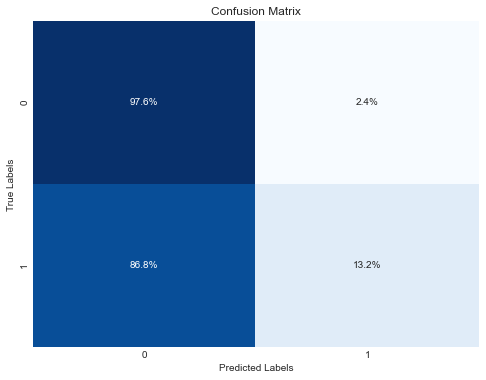

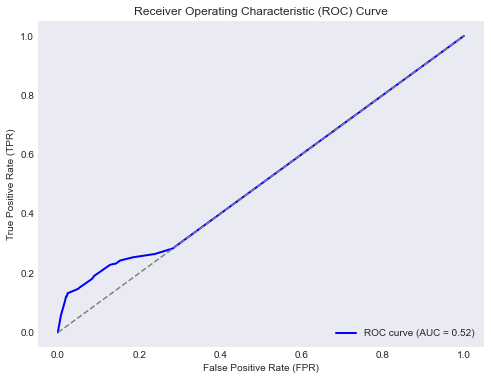

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, make_scorer


k_values = range(2, 40)

# Dictionary to store the average accuracy for each K value
k_accuracy = {}

# Perform k-fold cross-validation for each K value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_rus, y_rus, cv=k, scoring=make_scorer(accuracy_score))
    k_accuracy[k] = np.mean(scores)

# Find the best K value with the highest average accuracy
best_k = max(k_accuracy, key=k_accuracy.get)
best_accuracy = k_accuracy[best_k]

print(f"\nBest K Value: {best_k}")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_rus, y_rus)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy of the KNN model: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn, normalize = 'true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1%', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate the predicted probabilities of the positive class
y_probs = knn.predict_proba(X_test)
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### KNN is not that good so lets move on to RF

In [60]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, make_scorer

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 500, 1000,2000],  # Number of decision trees
    'max_depth': [5, 10,15],       # Maximum depth of the trees
    'max_features': [3,4,5,6]
}

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Create the GridSearchCV object with the model and hyperparameter grid
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(x_rus, y_rus)

# Print the best hyperparameters and best accuracy
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")


best_n_estimators = grid_search.best_params_['n_estimators']
best_max_depth = grid_search.best_params_['max_depth']
best_max_features = grid_search.best_params_['max_features']


Best Hyperparameters: {'max_depth': 5, 'max_features': 3, 'n_estimators': 1000}
Best Score: 0.65


Accuracy of the Random Forest model: 0.62
              precision    recall  f1-score   support

           0       0.86      0.60      0.70       804
           1       0.37      0.70      0.49       272

    accuracy                           0.62      1076
   macro avg       0.61      0.65      0.59      1076
weighted avg       0.73      0.62      0.65      1076



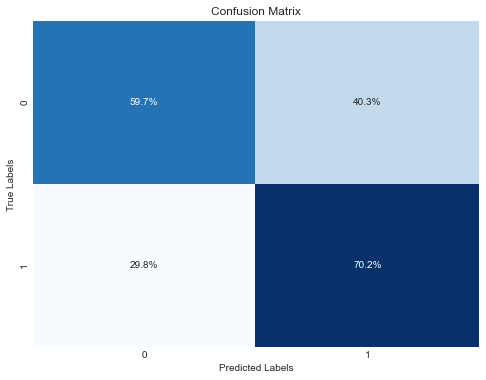

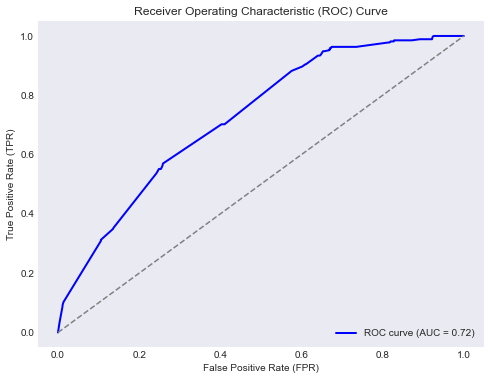

In [61]:
# Initialize and fit the Random Forest model
random_forest = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42, max_features=best_max_features, max_depth = best_max_depth)
random_forest.fit(x_rus, y_rus)

# Make predictions on the test set
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf, normalize = 'true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.1%', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate the predicted probabilities of the positive class
y_probs = random_forest.predict_proba(X_test)
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### RF is only as good as logistics regression. Lets try boosting

In [62]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [500,1000,2000],      # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],     # Learning rate
    'max_depth': [3, 5, 7]                # Maximum depth of the trees
}

# Create the GridSearchCV object with the model and hyperparameter grid
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(x_rus, y_rus)



GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Accuracy of the best GBM model: 0.62
              precision    recall  f1-score   support

           0       0.86      0.60      0.70       804
           1       0.37      0.70      0.49       272

    accuracy                           0.62      1076
   macro avg       0.61      0.65      0.59      1076
weighted avg       0.73      0.62      0.65      1076



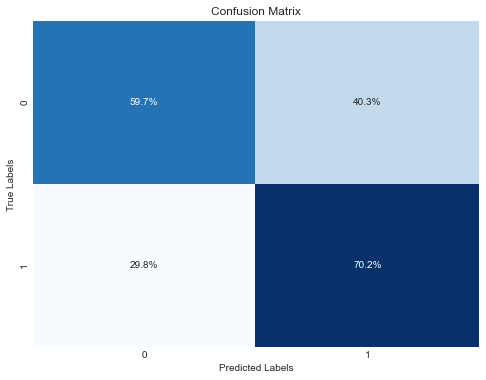

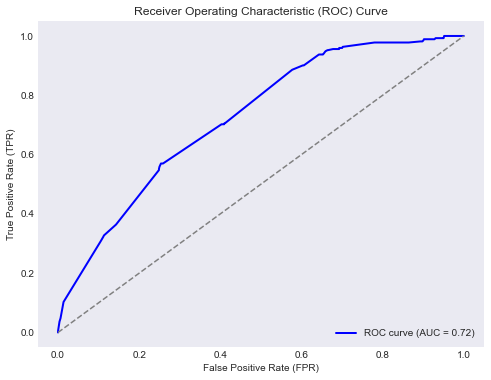

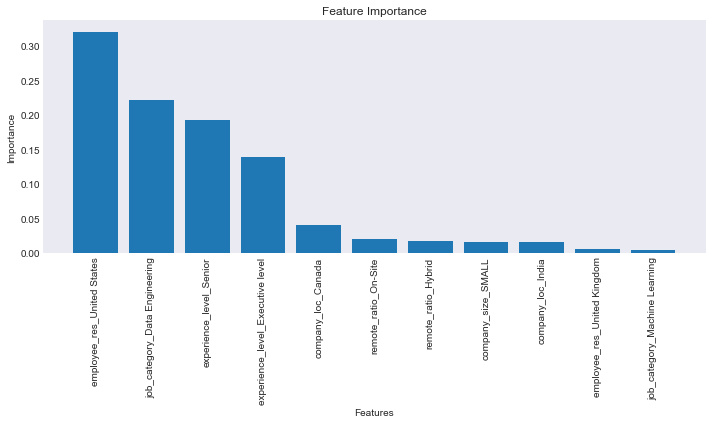

In [64]:
print(f"Best Hyperparameters: {grid_search.best_params_}")


# Get the best model
best_gbm = grid_search.best_estimator_
feature_importances = best_gbm.feature_importances_
# Make predictions on the test set using the best model
y_pred_gbm = best_gbm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_gbm)
print(f"Accuracy of the best GBM model: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_gbm))

cm = confusion_matrix(y_test, y_pred_gbm, normalize = 'true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='0.1%', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate the predicted probabilities of the positive class
y_probs = best_gbm.predict_proba(X_test)
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot the feature importances
# Get the column names of the features
feature_names = x_rus.columns

# Sort the feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx])
plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

### GBM boosting is similar to RF and logistic regression

In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [500, 1000, 2000],     # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],    # Learning rate
    'max_depth': [3, 5, 7]                 # Maximum depth of the trees
}

# Create the GridSearchCV object with the XGBoost classifier and hyperparameter grid
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(x_rus, y_rus)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

Accuracy of the best xgb model: 0.62
              precision    recall  f1-score   support

           0       0.85      0.59      0.70       804
           1       0.37      0.70      0.48       272

    accuracy                           0.62      1076
   macro avg       0.61      0.65      0.59      1076
weighted avg       0.73      0.62      0.65      1076



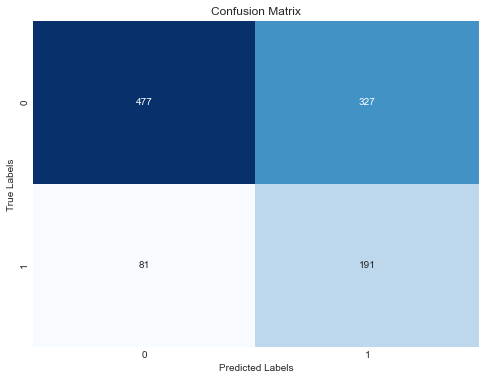

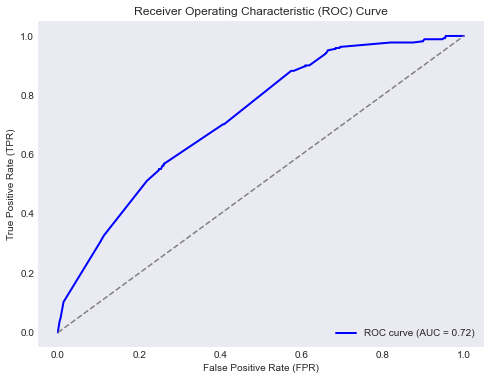

In [66]:
# Get the best model
best_xgb = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_xgb = best_xgb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of the best xgb model: {accuracy:.2f}")

# Print classification report
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate the predicted probabilities of the positive class
y_probs = best_xgb.predict_proba(X_test)
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XgBoost is also not very different. So as the last resort lets's try neural network

Epoch 1/250
18/18 [==============================] - 1s 12ms/step - loss: 0.6769 - accuracy: 0.6255 - val_loss: 1.0264 - val_accuracy: 0.0000e+00
Epoch 2/250
18/18 [==============================] - 0s 5ms/step - loss: 0.6733 - accuracy: 0.5931 - val_loss: 1.0745 - val_accuracy: 0.0000e+00
Epoch 3/250
18/18 [==============================] - 0s 5ms/step - loss: 0.6567 - accuracy: 0.6275 - val_loss: 0.7723 - val_accuracy: 0.0000e+00
Epoch 4/250
18/18 [==============================] - 0s 6ms/step - loss: 0.6603 - accuracy: 0.6255 - val_loss: 1.1809 - val_accuracy: 0.0000e+00
Epoch 5/250
18/18 [==============================] - 0s 5ms/step - loss: 0.6641 - accuracy: 0.6093 - val_loss: 0.8577 - val_accuracy: 0.0000e+00
Epoch 6/250
18/18 [==============================] - 0s 6ms/step - loss: 0.6601 - accuracy: 0.6245 - val_loss: 0.9629 - val_accuracy: 0.0000e+00
Epoch 7/250
18/18 [==============================] - 0s 6ms/step - loss: 0.6511 - accuracy: 0.6326 - val_loss: 1.3436 - val_accur

18/18 [==============================] - 0s 5ms/step - loss: 0.5802 - accuracy: 0.6822 - val_loss: 0.8446 - val_accuracy: 0.5202
Epoch 116/250
18/18 [==============================] - 0s 5ms/step - loss: 0.5788 - accuracy: 0.6690 - val_loss: 0.8940 - val_accuracy: 0.5202
Epoch 117/250
18/18 [==============================] - 0s 6ms/step - loss: 0.5822 - accuracy: 0.6721 - val_loss: 0.6694 - val_accuracy: 0.5484
Epoch 118/250
18/18 [==============================] - 0s 4ms/step - loss: 0.5816 - accuracy: 0.6842 - val_loss: 0.8692 - val_accuracy: 0.5202
Epoch 119/250
18/18 [==============================] - 0s 5ms/step - loss: 0.5827 - accuracy: 0.6711 - val_loss: 0.7589 - val_accuracy: 0.5363
Epoch 120/250
18/18 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.6741 - val_loss: 0.8181 - val_accuracy: 0.5202
Epoch 121/250
18/18 [==============================] - 0s 6ms/step - loss: 0.5793 - accuracy: 0.6812 - val_loss: 0.7509 - val_accuracy: 0.5363
Epoch 122/250

18/18 [==============================] - 0s 6ms/step - loss: 0.5775 - accuracy: 0.6832 - val_loss: 0.8612 - val_accuracy: 0.5323
Epoch 230/250
18/18 [==============================] - 0s 6ms/step - loss: 0.5782 - accuracy: 0.6832 - val_loss: 0.7340 - val_accuracy: 0.5484
Epoch 231/250
18/18 [==============================] - 0s 5ms/step - loss: 0.5780 - accuracy: 0.6842 - val_loss: 0.8057 - val_accuracy: 0.5484
Epoch 232/250
18/18 [==============================] - 0s 6ms/step - loss: 0.5780 - accuracy: 0.6832 - val_loss: 0.8605 - val_accuracy: 0.5444
Epoch 233/250
18/18 [==============================] - 0s 6ms/step - loss: 0.5790 - accuracy: 0.6832 - val_loss: 0.8456 - val_accuracy: 0.5444
Epoch 234/250
18/18 [==============================] - 0s 5ms/step - loss: 0.5786 - accuracy: 0.6822 - val_loss: 0.8035 - val_accuracy: 0.5484
Epoch 235/250
18/18 [==============================] - 0s 5ms/step - loss: 0.5759 - accuracy: 0.6802 - val_loss: 0.6923 - val_accuracy: 0.5484
Epoch 236/250

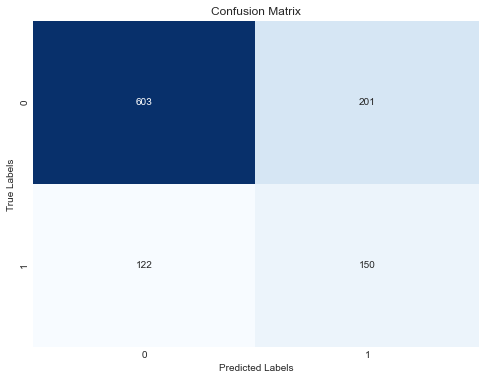

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       804
           1       0.43      0.55      0.48       272

    accuracy                           0.70      1076
   macro avg       0.63      0.65      0.64      1076
weighted avg       0.73      0.70      0.71      1076



In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report

# Assuming 'X_train', 'y_train', 'X_test', and 'y_test' are your training and testing data

# Step 3: Define the architecture of the neural network
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='softplus'))  # Hidden layer with 32 neurons and ReLU activation
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and Sigmoid activation

# Step 4: Compile the model
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)
model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_rus, y_rus, epochs=250, batch_size=55, validation_split=0.2)

# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

# Make predictions on the test set
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype(int)  # Threshold probabilities to get binary labels


# Calculate precision, recall, and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Print classification report (includes precision, recall, and more)
print("Classification Report:")
print(classification_report(y_test, y_pred))



In [69]:
# Calculate the predicted probabilities of the positive class
y_probs = model.predict_proba(X_test)
# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs[:, 1])  # 'y_probs[:, 1]' contains the probabilities of the positive class
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AttributeError: 'Sequential' object has no attribute 'predict_proba'

In [ ]:
# model.fit(x_rus, y_rus, epochs=20, batch_size=5, validation_split=0.03)
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.38      0.54       804
           1       0.33      0.91      0.49       272

    accuracy                           0.52      1076
   macro avg       0.63      0.65      0.52      1076
weighted avg       0.78      0.52      0.53      1076



# model.add(Dense(64, activation='softplus', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
# model.add(Dense(32, activation='sigmoid'))  # Hidden layer with 32 neurons and ReLU activation
# model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron and Sigmoid activation
# # Step 5: Train the model
# model.fit(x_rus, y_rus, epochs=75, batch_size=50, validation_split=0.2)
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       804
           1       0.43      0.55      0.48       272

    accuracy                           0.70      1076
   macro avg       0.63      0.65      0.64      1076
weighted avg       0.73      0.70      0.71      1076

# model.add(Dense(64, activation='sigmoid', input_dim=X_train.shape[1]))  # Input layer with 64 neurons and ReLU activation
# model.add(Dense(32, activation='sigmoid'))  # Hidden layer with 32 neurons and ReLU activation
# model.add(Dense(1, activation='softplus'))  # Output layer with 1 neuron and Sigmoid activation
# sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)
# model.compile(loss='binary_crossentropy', optimizer=sgd_optimizer, metrics=['accuracy'])

# # Step 5: Train the model
# model.fit(x_rus, y_rus, epochs=250, batch_size=55, validation_split=0.2)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       804
           1       0.43      0.53      0.47       272

    accuracy                           0.70      1076
   macro avg       0.63      0.65      0.63      1076
weighted avg       0.73      0.70      0.71      1076

In [ ]:
### Neural network has the best prediction compared to other models. It is still not great but with more samples and maybe better feature engineering technique that are out of scope we can further improve the model